# Ejercicios Pair Programming 
## Lección 13 - Regresión Logística EDA

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [160]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (10,10)

# Warning
import warnings
warnings.filterwarnings('ignore')

### Objetivos

Los objetivos de hoy son:

1.- Buscar un conjunto de datos a analizar:

Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.


Desde Kaggle hemos decidido utilizar este conjunto de datos que consiste en las calificaciones obtenidas por los estudiantes en varias materias en EEUU.

In [135]:
# Cargamos el dataframe
df = pd.read_csv("resultados_estudiantes.csv", index_col=0)

2.- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

In [136]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75


In [137]:
# Reseteamos el index para que gender sea una columna de nuestro dataframe
df.reset_index(inplace=True)

In [138]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Información de las variables que se encuentran en nuestro conjunto de datos:

.- gender = género.

.- race/ethnicity = raza. Hemos buscado información acerca de dichos grupos y por el Código Nacional de Diccionario de Datos (Data Dictionary on National Codes) significa cada grupo:
        
        Group A - White - British.

        Group B - White - Irish.
        
        Group C - White - Any other White background.
        
        Group D - Mixed - White and Black Caribbean.
        
        Group E - Mixed - White and Black African.
        
        Group F - Mixed - White and Asian.
        
        Group G - Mixed - Any other mixed background.

.- parental level of education = nivel de educación de los padres.

.- lunch = almuerzo.

.- test preparation course = curso de preparación para el examen.

.- math score = resultados matemáticos.

.- reading score = resultados de lectura.

.- writing score = resultados de escritura.

### Análisis Exploratorio

In [139]:
# Vemos la dimensión de nuestro dataframe. Tiene un total de 1000 filas y 8 columnas.
df.shape

(1000, 8)

In [140]:
# Vemos las columnas de nuestro dataframe.
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [141]:
# # Vemos de manera más general el tipo de datos y nulos que tiene nuestro dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [142]:
# Visualizamos los principales estadísticos de las columnas numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [143]:
# Visualizamos los principales estadísticos de las columnas categóricas.
df.describe(include="object").T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [144]:
# Visualizamos los nulos de nuestro dataframe.
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [145]:
# Visualizmos los duplicados de nuestro dataframe.
df.duplicated().sum()

0

#### Detección de Outliers y tratamiento de los mismos

In [146]:
# Creamos un dataframe para las columnas numéricas.
numericas = df.select_dtypes(include=np.number)
numericas.head(2)

,math score,reading score,writing score
0,72,72,74
1,69,90,88


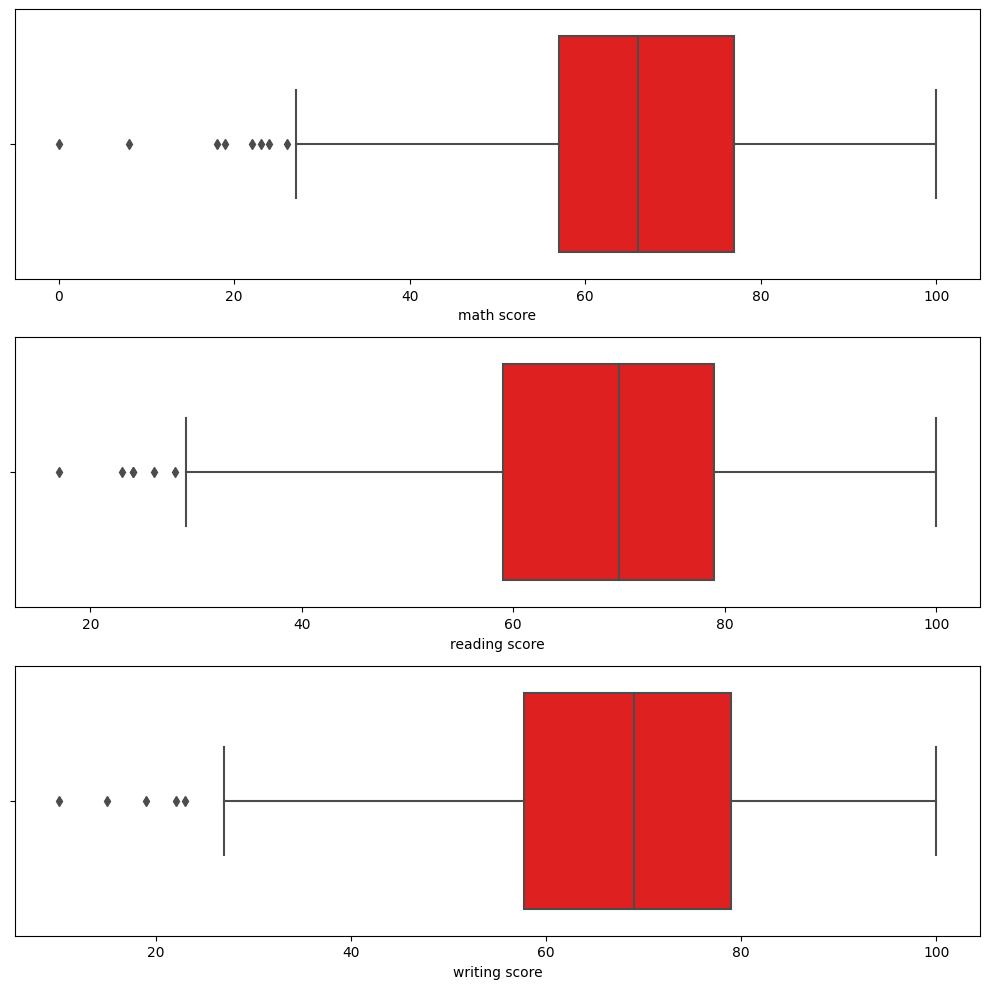

In [147]:
# Visualizamos nuestros outliers de las columnas numéricas a través de la visualización con boxplots.

fig, axes = plt.subplots(3, 1, figsize=(10,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "red"); # para trazar una línea de densidad

    
plt.tight_layout()

plt.show()

Observando las gráficas vemos que tienen outliers las tres variables numéricas. Estos outliers están en la zona de los suspensos y son muy pocos teniendo en cuenta el número total de datos que tenemos. Vamos a proceder a identificarlos para ver como actuamos con ellos

In [148]:
df2 = df[df["math score"] <= 26]

In [149]:
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [150]:
df3 = df[df["reading score"] <= 26]

In [151]:
df3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [152]:
df4 = df[df["writing score"] <= 23]

In [153]:
df4

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


Viendo los id de los estudiantes a los que pertencen los outliers entre "reading score" y "writing score" coinciden al 100%, por lo que los eliminaremos. De estos cinco, dos de ellos coinciden también con los ocho de "math score" lo que nos lleva también a considerar los seis restantes de "math score", ya que en relación al número total de filas que tenemos (1000 filas) es una cantidad residual.

In [154]:
df.drop([17, 59, 145, 338, 466, 787, 842, 980, 76, 327, 596], axis = 0, inplace = True)

In [155]:
# Creamos un dataframe para las columnas numéricas.
numericas2 = df.select_dtypes(include=np.number)
numericas2.head(2)

,math score,reading score,writing score
0,72,72,74
1,69,90,88


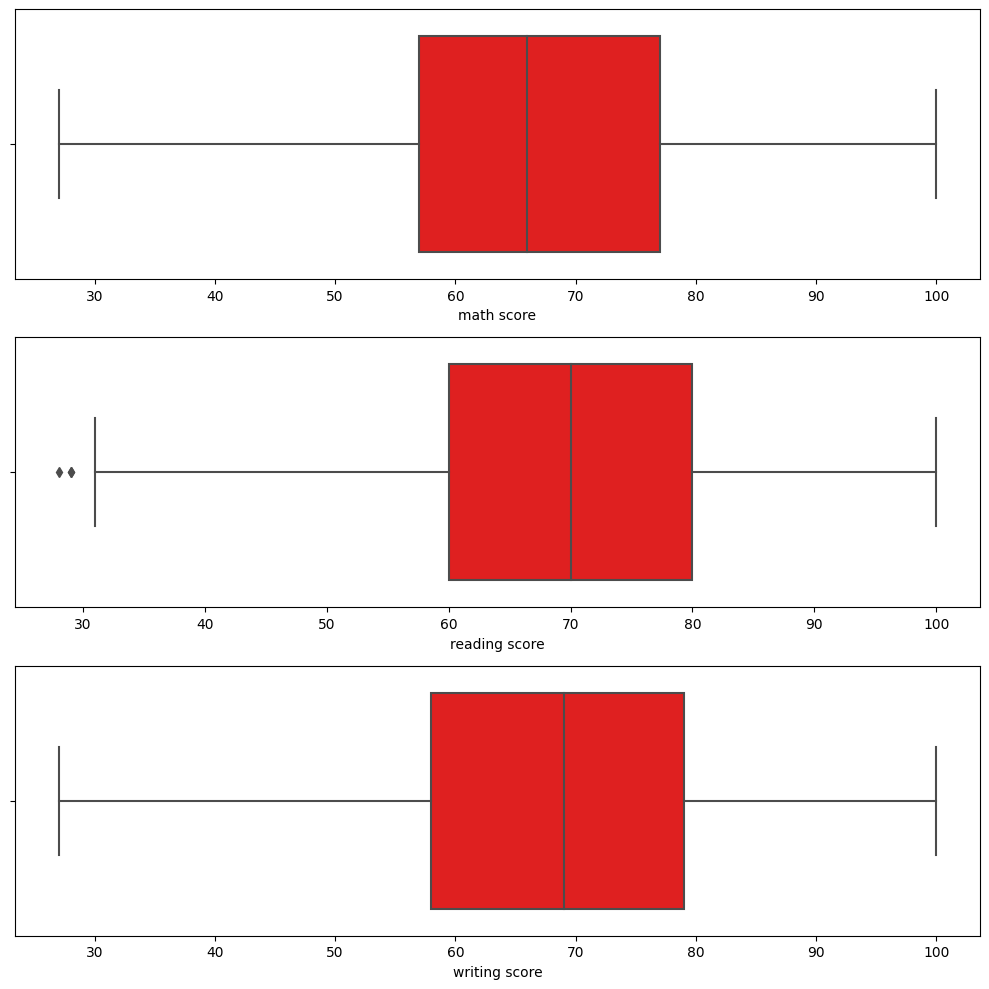

In [156]:
# Visualizamos de nuevo el dataframe sin outliers.

fig, axes = plt.subplots(3, 1, figsize=(10,10))

axes = axes.flat

for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df, ax=axes[indice], color = "red"); # para trazar una línea de densidad

    
plt.tight_layout()

plt.show()

Tras la eliminación de los outliers podemos ver que nuestras variables numéricas se encuentran limpias de ellos, excepto "reading score" que tiene dos outliers nuevos tras la eliminación. Decidimos dejar dichos outliers ya que no nos afecta a nuestro estudio.

#### Limpieza de dataframe (cambio de columnas espacios en blanco por "_")

In [158]:
# Cambiamos el nombre de las columnas con espacios en blanco por "_"
columnas_nuevas = {col:col.replace(" ", "_") for col in df.columns}
df.rename(columns=columnas_nuevas, inplace=True)
df.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Análisis Exploratorio Visual

In [159]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Nuestra variable respuesta en este dataframe será "gender" porque queremos saber qué género saca mejores resultados en los exámenes. Empezaremos a trabajar sobre esto a través de una serie de gráficas para entender el comportamiento de dicha variable.

Lo primero que vamos hacer es cambiar nuestra variable respuesta a variable dicotómica: 0 - Female, 1 - Male. Nos basamos en orden alfabético y numérico, es decir, la f va antes que la m por lo tanto female será el 0 y male será el 1.

In [161]:
# Utilizaremos el Enconding "map" que nos da un orden en las etiquetas, es decir, a través de un diccionario
# decidiremos que correspondencia tiene cada valor único.

mapa = {"female": 0, "male": 1}
df["gender"] = df["gender"].map(mapa)

In [162]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


In [163]:
df["gender"].unique()

array([0, 1])

### Variable respuesta: Distribución de los datos

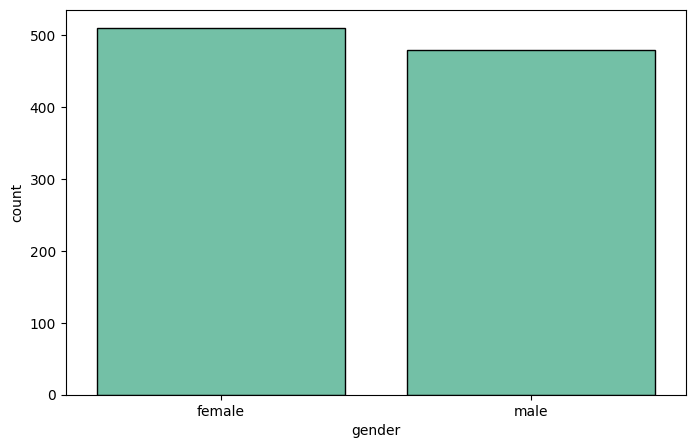

In [164]:
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df, x = "gender",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["female", "male"]) 
plt.show();

En esta gráfica por ahora lo que vemos es que en los resultados de los exámenes hay más mujeres que hombres sin que haya una diferencia muy marcada.

### Variables Categóricas

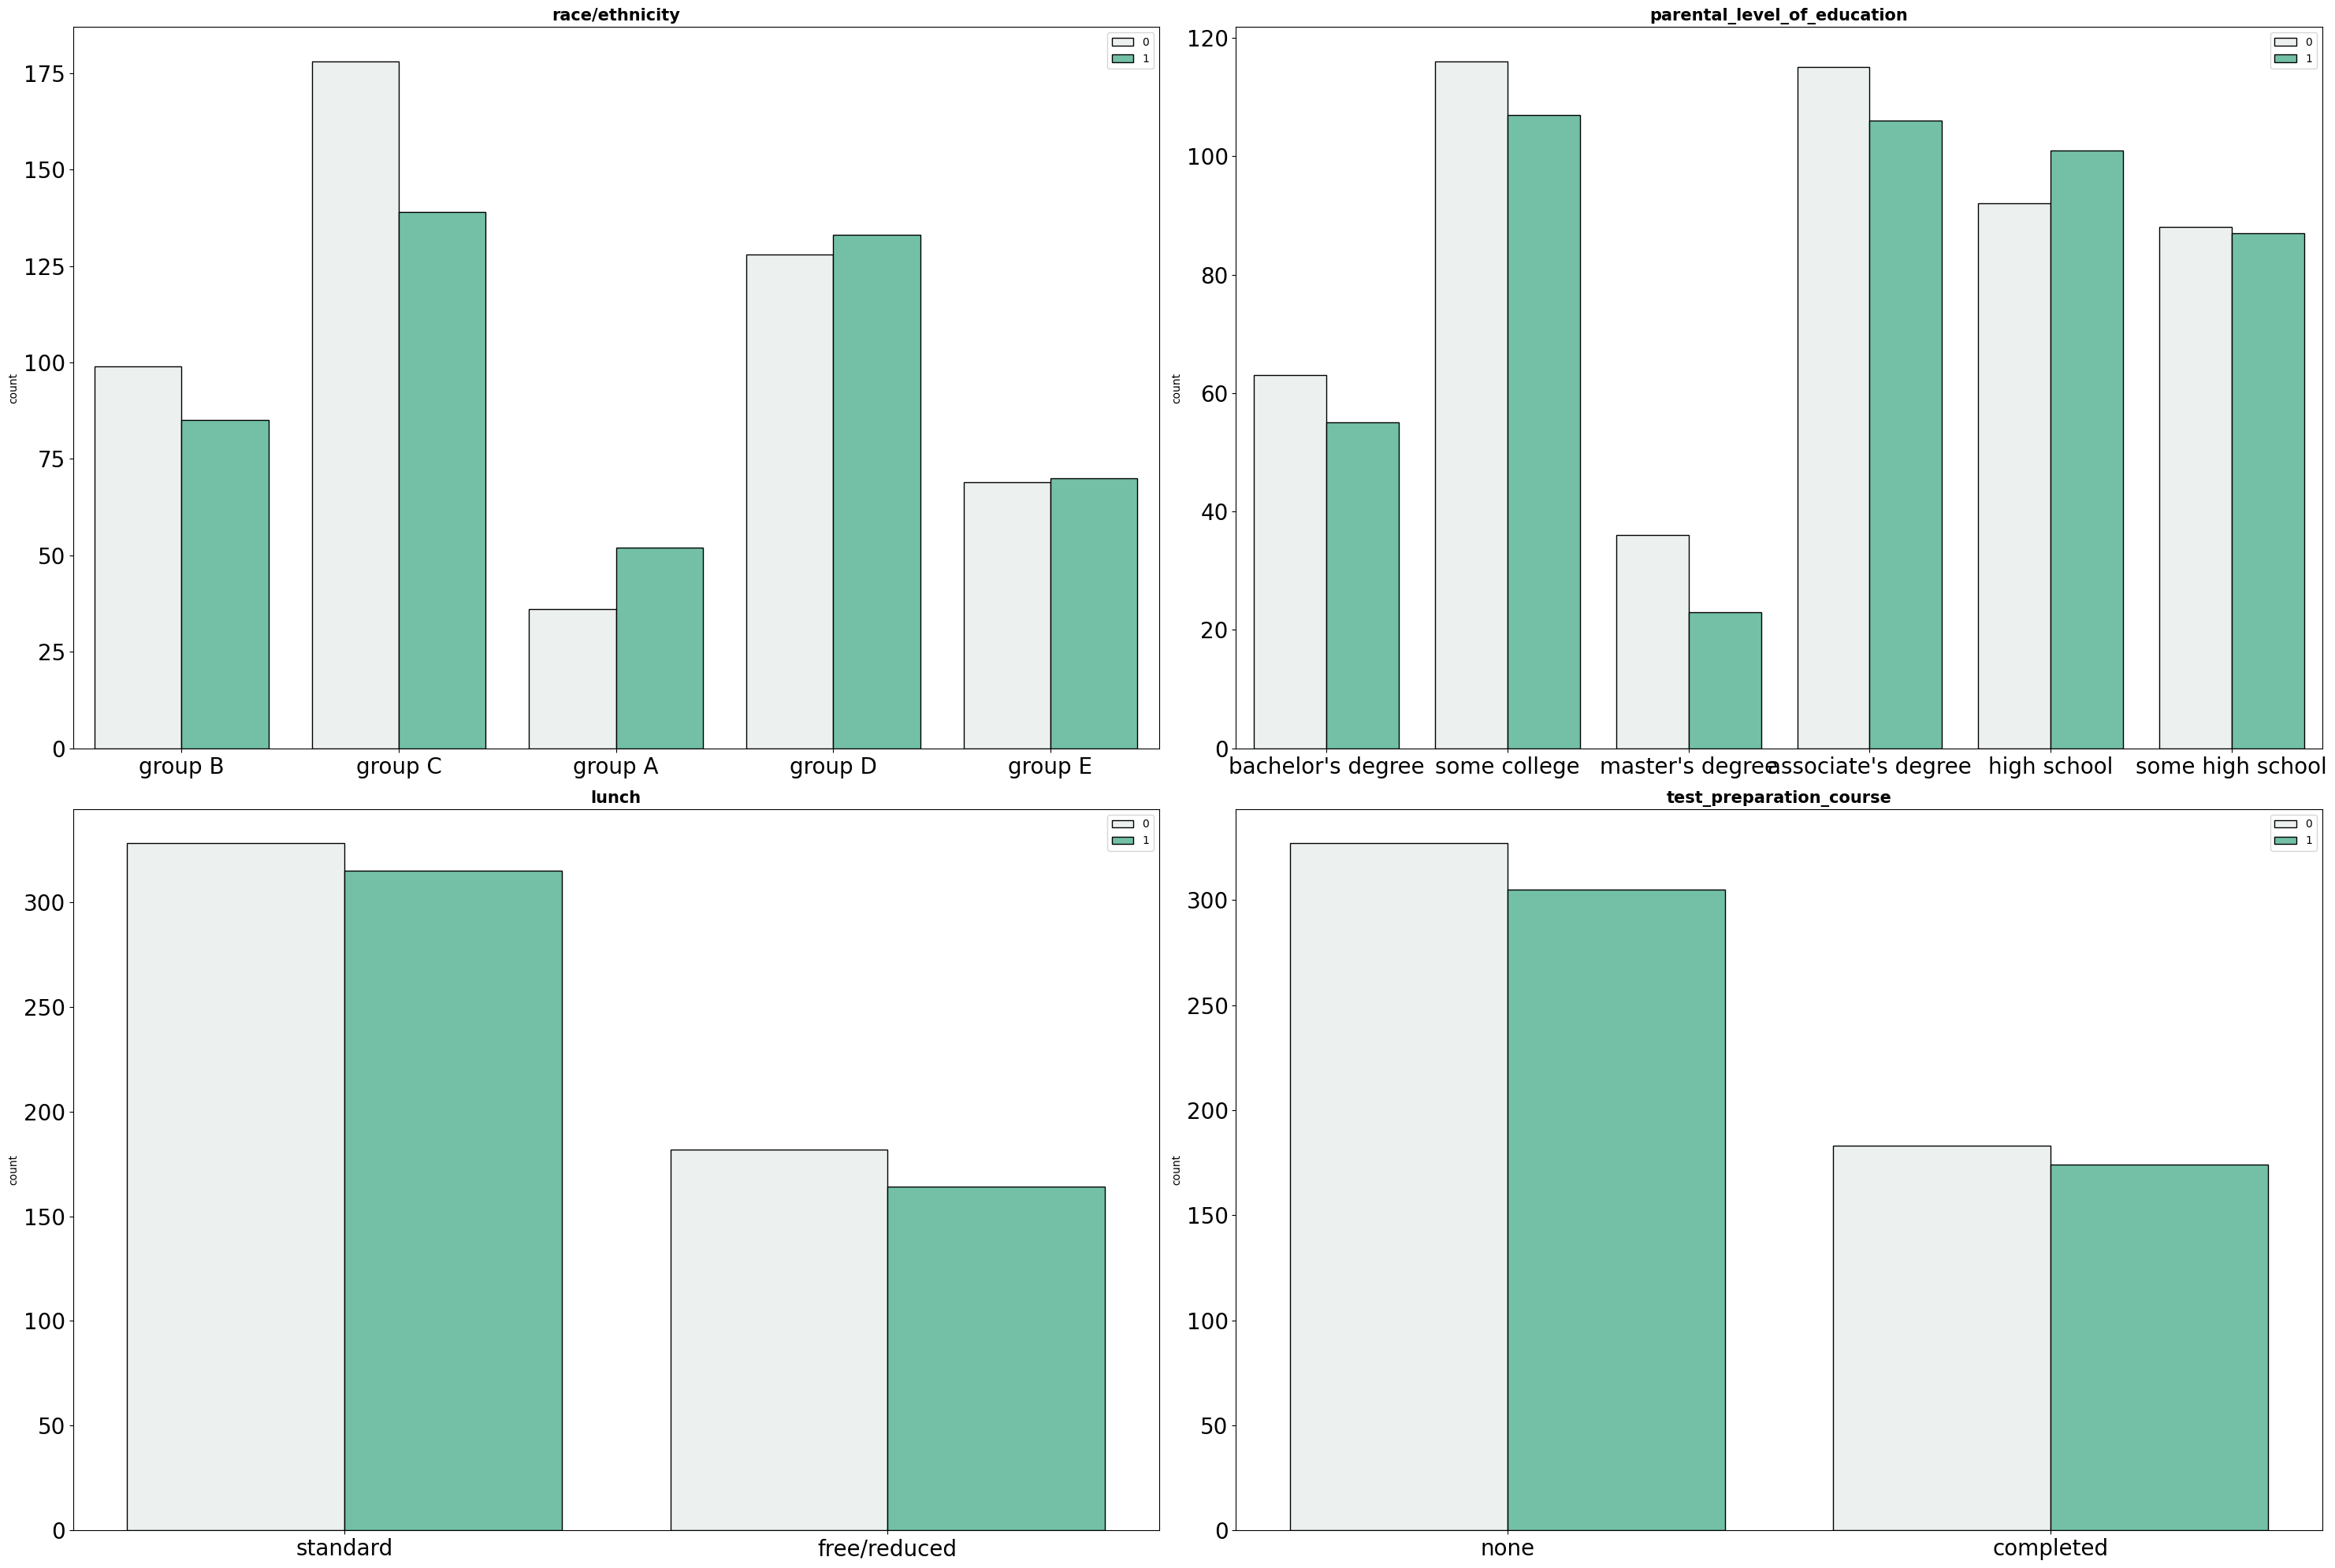

In [170]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "gender",
        color = "mediumaquamarine",  
        edgecolor='black',
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Group A - White - British.

        Group B - White - Irish.
        
        Group C - White - Any other White background.
        
        Group D - Mixed - White and Black Caribbean.
        
        Group E - Mixed - White and Black African.
        
        Group F - Mixed - White and Asian.
        
        Group G - Mixed - Any other mixed background.

Viendo estas gráficas vamos a ver la proporción de hombres y mujeres en relación con las diferentes variables:

.- race - gender = tanto en el grupo C como en el B hay más mujeres que hombres (personas blancas de Irlanda y otras personas blancas). En los otros grupos A, D y E (personas blancas de Inglaterra, personas negras caribeñas y personas negras africanas) hay más hombres que mujeres siendo en el E la diferencia casi inapreciable. Cabe destacar que los grupos F y G no estarían representados en esta gráfica.

.- parental_level_education - gender = vemos que los niveles educacionales más altos con respecto a los padres de los estudiantes son de las mujeres estando a un mismo nivel la categoría de "some high school" y siendo superior la de los hombres en "high school". 

.- lunch - gender = vemos la influencia de la comida en los resultados académicos. Se divide en normal y reducida en azúcares y grasas. Las mujeres predominan en ambas categorías.

.- test_preparation_course - gender = vemos el curso preparatorio completado o no, y una vez más las mujeres predominan en ambas categorías.

### Variables continuas

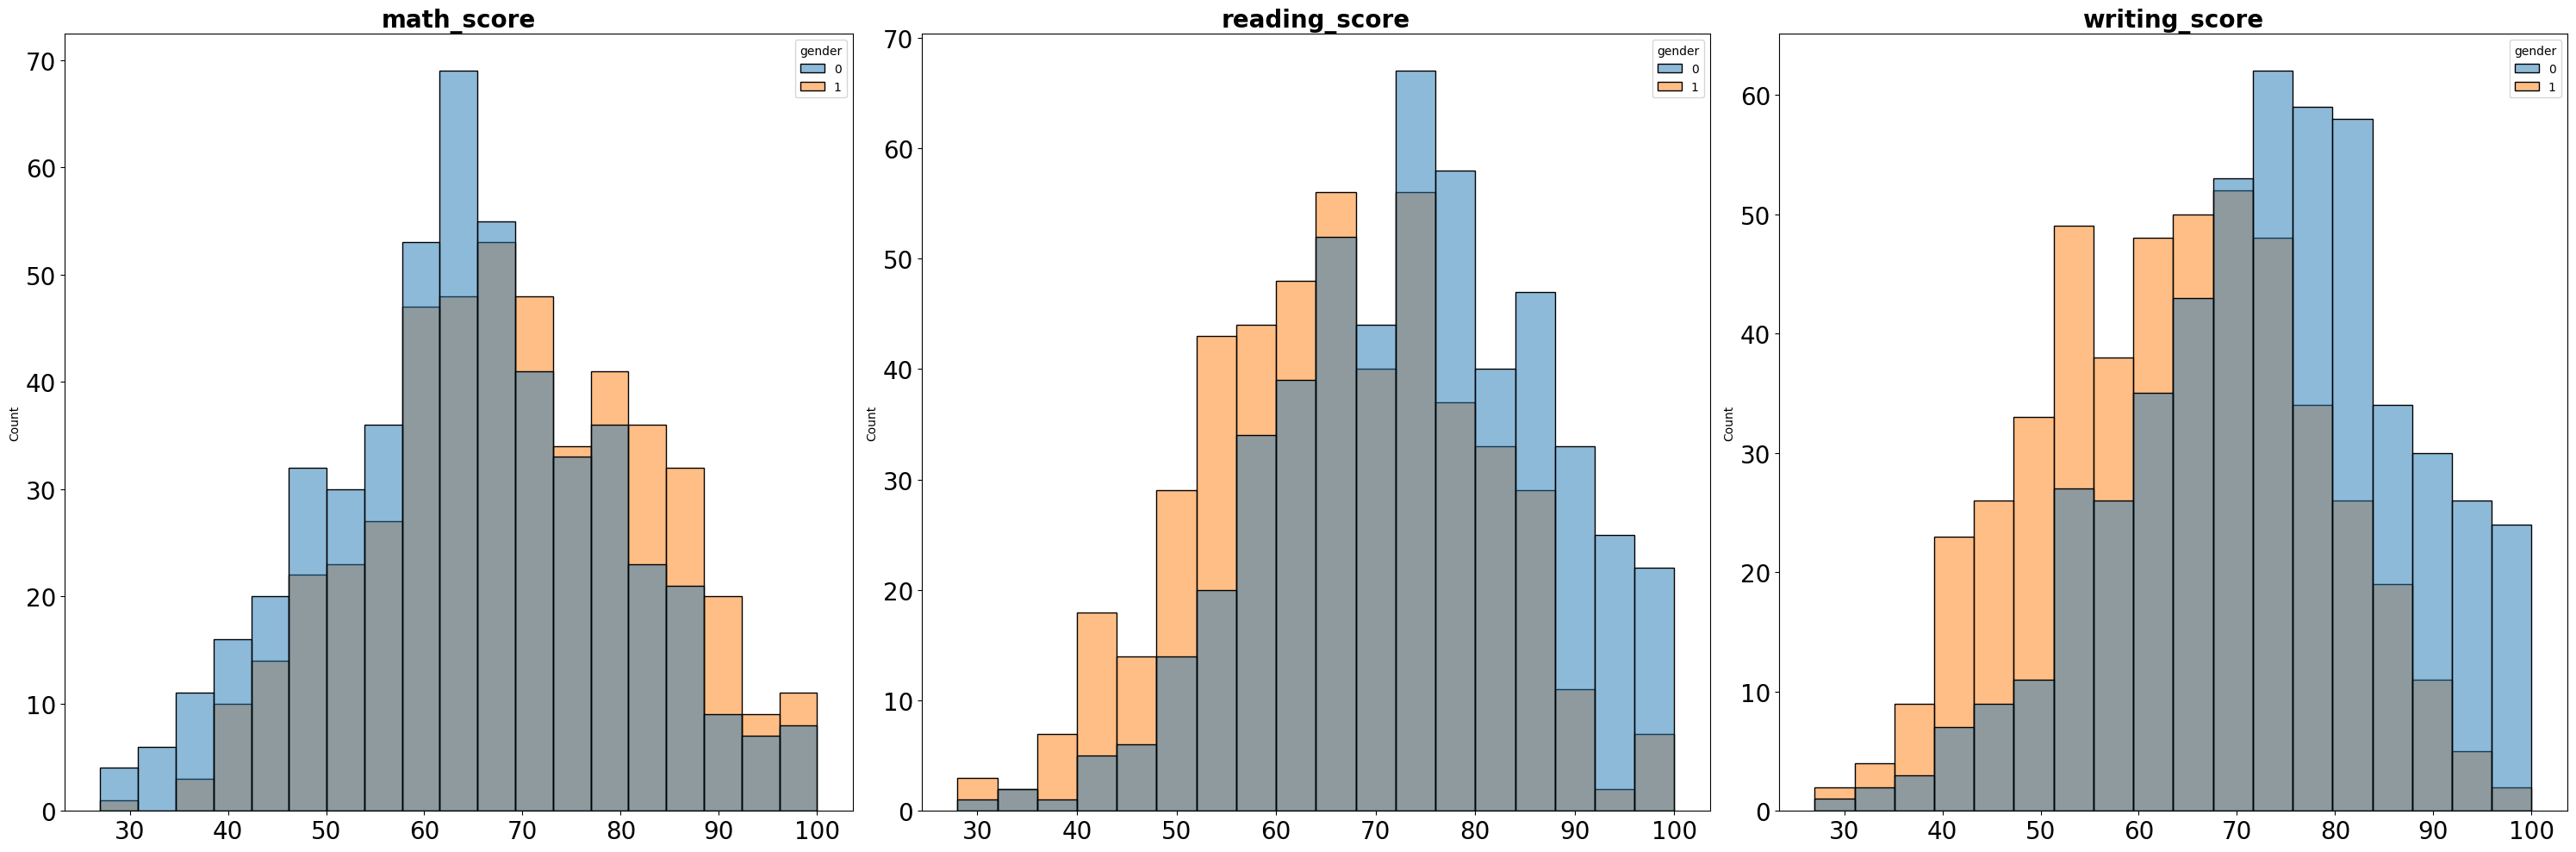

In [174]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("gender")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "gender", 
        line_kws = {"linewidth": 2}, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

Ahora procederemos a ver la distribución de nuestras variables numéricas con el género:

.- math_score - gender = destacan las mujeres hasta una puntuación del 70% (aproximadamente). Siendo los hombres mejores en matemáticas que las mujeres.

.- reading_score - gender = al contrario que en matemáticas aquí las mujeres son mejores que los hombres, destacando en puntuaciones desde el 70 al 100%.

.- writing_score - gender = al igual que en el reading score las mujeres son mejores que los hombres desde un 70%.

Sacamos en conclusión sobre estas gráficas que los hombres obtienen mejores resultados en ciencias y las mujeres en letras.

## Gráfico de correlación o Heatmap

Ahora veremos la relación entre las características y nuestra variable respuesta.

In [175]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

,gender,math_score,reading_score,writing_score
0,0,72,72,74
1,0,69,90,88
2,0,90,95,93
3,1,47,57,44
4,1,76,78,75


In [176]:
# Creamos la matriz de correlación.
correlacion = df_numericas.corr()
correlacion

,gender,math_score,reading_score,writing_score
gender,1.000000,0.159940,-0.266513,-0.328172
math_score,0.159940,1.000000,0.802466,0.784543
reading_score,-0.266513,0.802466,1.000000,0.951044
writing_score,-0.328172,0.784543,0.951044,1.000000


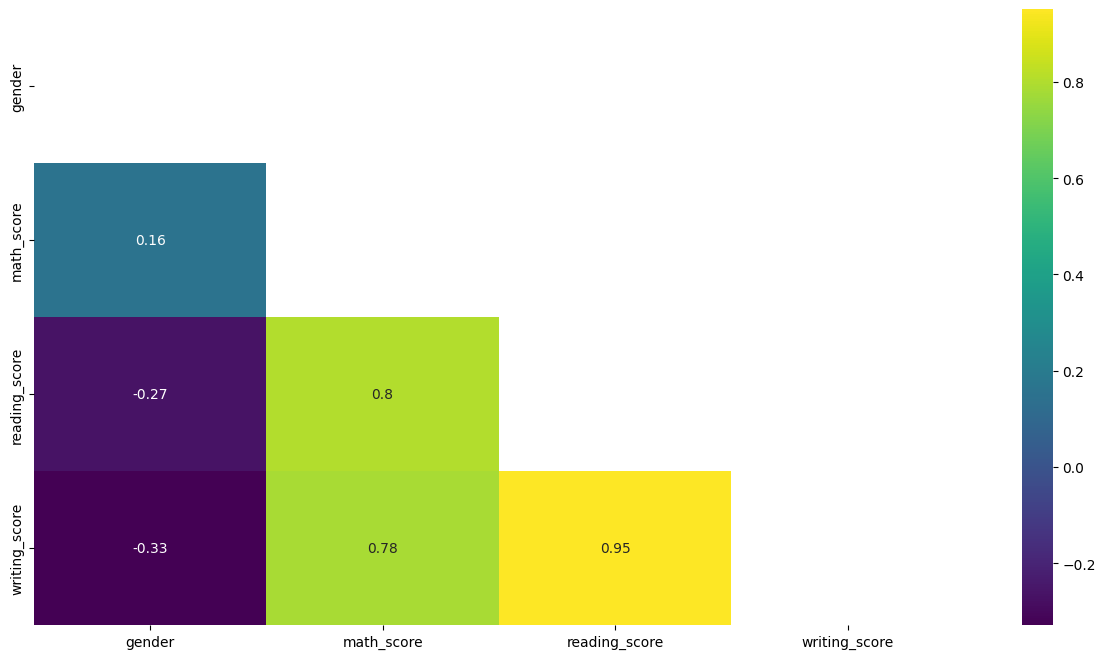

In [177]:
# Visualizamos la correlación a través del heatmap
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); 

Apreciamos que reading_score tanto con writing_score como con math_score tiene una correlación positiva muy alta, es decir, a mayor resultado en lectura también obtienes mayores resultados en escritura y matemáticas, lo cual tiene su lógica ya que la lectura es la base tanto de la escritura como de la lógica matemática (comprensión lectora). En el caso de gender con reading_score y writing_score la correlación es negativa baja, es decir, los resultados obtenidos en estos dos exámenes no están directamente relacionados con el género que pertenezcas. Por último, gender con math_score tiene una correlación positiva muy baja, es decir, los resultados obtenidos en este examen no están directamente relacionados con el género que pertenezcas.

Viendo nuestro EDA, vemos que las mujeres han obtenido mejores puntuaciones en las asignaturas de letras así como los hombres en las de ciencias. Sin embargo según el heatmap estas puntuaciones no estarían tan relacionadas con el género, en análisis posteriores veremos si es así o no.

Guardamos el csv con los cambios realizados para poder trabajar en el próximo pair

In [178]:
df.to_csv("resultados_estudiantes_limpio.csv")

Happy coding 📊📈📉